# Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import os

# Load Dataset

In [7]:
train_dir = 'Vegetable_Images/train'
validation_dir = 'Vegetable_Images/validation'
test_dir = 'Vegetable_Images/test'

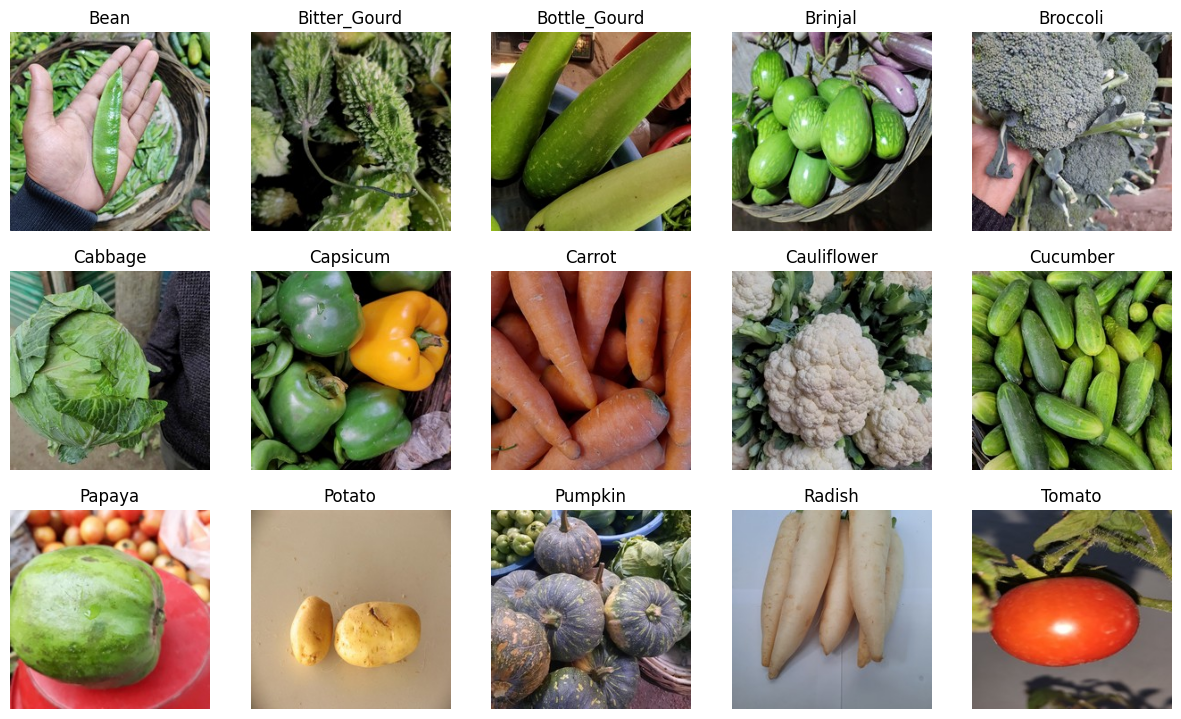

In [10]:
train_dir = 'Vegetable_Images/train'
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 
               'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 
               'Pumpkin', 'Radish', 'Tomato']

# Plot sample images from each class
plt.figure(figsize=(15, 15))
for i, class_name in enumerate(class_names):
    # Get the first image in the class directory
    image_path = os.path.join(train_dir, class_name, os.listdir(os.path.join(train_dir, class_name))[10])
    # Load and display the image
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(image_path))
    plt.title(class_name)
    plt.axis('off')

plt.show()

# Image Preprocessing 

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

data_train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle = True
)

data_validation = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle = False 
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# Build Model

In [39]:
def create_model():
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(15, activation='softmax')
    ])

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=['accuracy'])

    return model

In [40]:
model = create_model()

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

In [41]:
history = model.fit(data_train,
                   epochs=100,
                   validation_data=data_validation,
                   verbose=1)

Epoch 1/100
469/469 [==============================] - 73s 153ms/step - loss: 1.8850 - accuracy: 0.3573 - val_loss: 1.1394 - val_accuracy: 0.5897
Epoch 2/100
469/469 [==============================] - 69s 148ms/step - loss: 1.2562 - accuracy: 0.5723 - val_loss: 0.9002 - val_accuracy: 0.7027
Epoch 3/100
469/469 [==============================] - 70s 148ms/step - loss: 1.0108 - accuracy: 0.6637 - val_loss: 0.5682 - val_accuracy: 0.8327
Epoch 4/100
469/469 [==============================] - 70s 148ms/step - loss: 0.8894 - accuracy: 0.7031 - val_loss: 0.4750 - val_accuracy: 0.8510
Epoch 5/100
469/469 [==============================] - 70s 148ms/step - loss: 0.7838 - accuracy: 0.7390 - val_loss: 0.3435 - val_accuracy: 0.9023
Epoch 6/100
469/469 [==============================] - 70s 149ms/step - loss: 0.7057 - accuracy: 0.7649 - val_loss: 0.3436 - val_accuracy: 0.8983
Epoch 7/100
469/469 [==============================] - 73s 155ms/step - loss: 0.6711 - accuracy: 0.7843 - val_loss: 0.2747 -

# Evaluate Model

In [42]:
history.history['val_loss']

[1.1394197940826416,
 0.9002386927604675,
 0.5682405829429626,
 0.47500675916671753,
 0.34351128339767456,
 0.34356969594955444,
 0.2747230529785156,
 0.2620736360549927,
 0.22324250638484955,
 0.23027098178863525,
 0.2429654896259308,
 0.14440631866455078,
 0.18188263475894928,
 0.15839575231075287,
 0.13140060007572174,
 0.14546433091163635,
 0.134834885597229,
 0.16728083789348602,
 0.1506841778755188,
 0.12761290371418,
 0.11097712069749832,
 0.10907383263111115,
 0.13991189002990723,
 0.11080431938171387,
 0.10359912365674973,
 0.1624990999698639,
 0.10004296153783798,
 0.12635557353496552,
 0.10202731192111969,
 0.08527229726314545,
 0.08782065659761429,
 0.0993310883641243,
 0.08872570097446442,
 0.07961282879114151,
 0.09969087690114975,
 0.0644066333770752,
 0.05747268348932266,
 0.0728268101811409,
 0.07428519427776337,
 0.06083057075738907,
 0.06331579387187958,
 0.06906339526176453,
 0.052464600652456284,
 0.07488933205604553,
 0.06855179369449615,
 0.07227113097906113,
 0.

In [43]:
accuracy_score = model.evaluate(data_test)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
 
print("Loss: ",accuracy_score[0])

94/94 [==============================] - 22s 230ms/step - loss: 0.0807 - accuracy: 0.9830
[0.08073435723781586, 0.9829999804496765]
Accuracy: 98.3000%
Loss:  0.08073435723781586


94/94 [==============================] - 4s 42ms/step


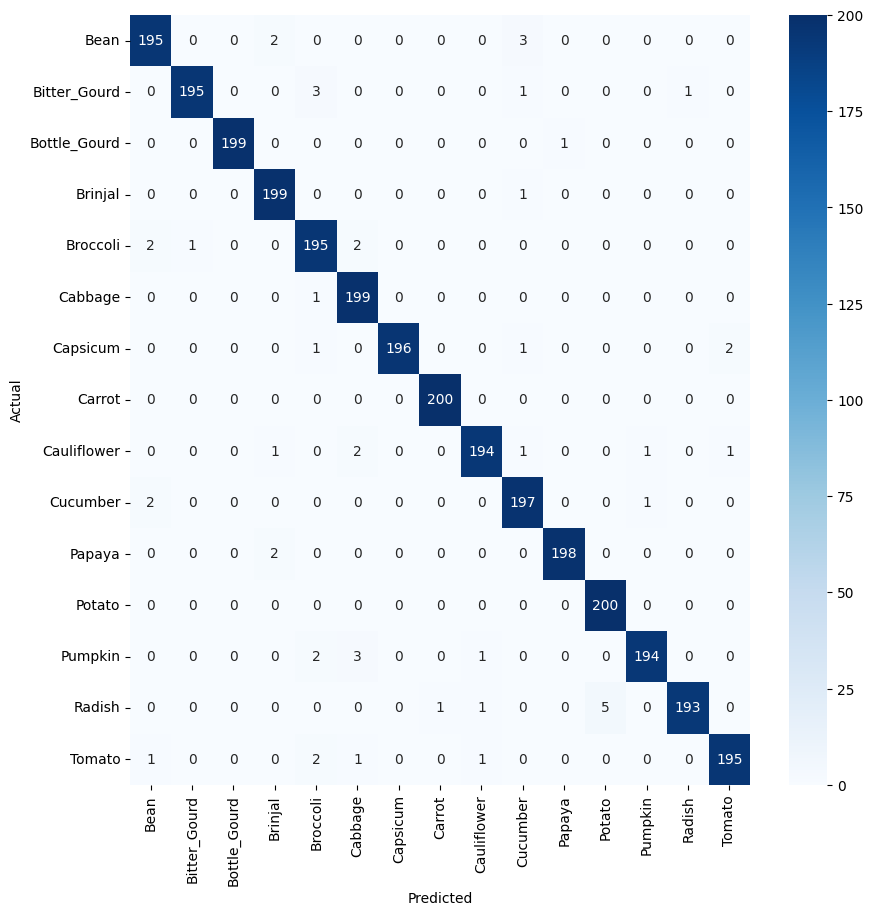

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(data_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = data_test.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_test.class_indices.keys(), yticklabels=data_test.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualize Accuracy and Loss

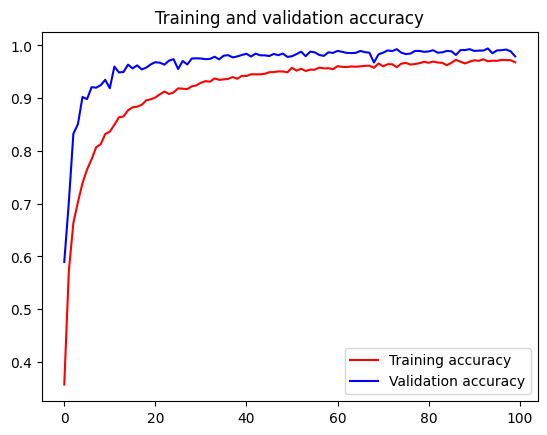

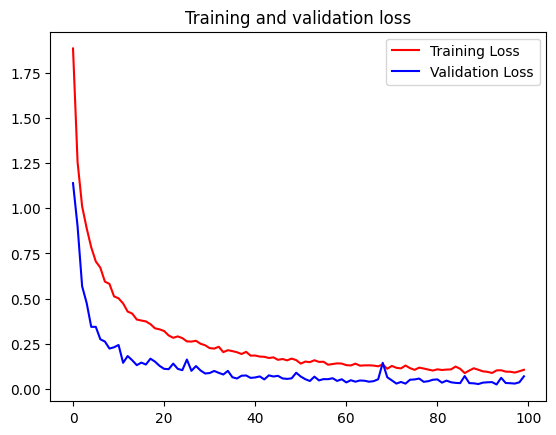

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Saved Model

In [9]:
model.save('thirdmodel.h5')
print('Model Saved!')


NameError: name 'model' is not defined

# Load Model

In [10]:
# load model
from tensorflow.keras.models import load_model
savedModel=load_model('thirdmodel.h5')
savedModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

# Test Model

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

data_test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle = True
)

Found 3000 images belonging to 15 classes.


In [12]:
# Evaluate the model
test_loss, test_accuracy = savedModel.evaluate(data_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict the class of a few images
import numpy as np
import matplotlib.pyplot as plt

# Function to plot images with predictions
def plot_images(images_arr, predictions, true_labels):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, pred, true_label in zip(images_arr, axes, predictions, true_labels):
        ax.imshow(img)
        ax.set_title(f'Pred: {pred}\nTrue: {true_label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the test set
test_images, test_labels = next(data_test)

# Make predictions on the batch
predictions = savedModel.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Plot a few test images with predictions
plot_images(test_images[:15], predicted_classes[:15], true_classes[:15])